# Evaluation Metrics

Evaluation metrics are used to measure model performance and shouldn't be confused with loss functions. Metrics are related to our target or task indicating our expectations. Loss functions are used for optimization process of model learning and generally they are differentiable. For example cross entropy loss is differentiable but accuracy is not.

In [2]:
import importlib
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Precatuion in case content of utilities is changed and
# need to be reloaded
import utilities
importlib.reload(utilities)
from utilities import create_folds

sns.set_theme()

Most common evaluation metrics for classification and regression are as follows:

| Classification | Regression |
|:--|:--|
| Accuracy | Mean absolute error (MAE) |
| Precision (P) |  Mean squared error (MSE)|
| Recall (R) |  Root mean squared error (RMSE)|
| F1 score (F1)| Root mean squared logarithmic error (RMSLE)
| Area under the ROC curve or simply (AUC)| Mean percentage error (MPE)
| Log loss| Mean absolute percentage error (MAPE)|
||$R^{2}$ |
|**Multi-label Classification**| |
| Precision at k (P@k)|  |
| Average precision at k (AP@k)| |
| Mean average precision at k (MAP@k)|| 

Most metrics are self explanatory except $R^{2}$. This metric is called Coefficient of determination and measures goodness of fit of a model.


### Classification of Predictions

Using a fine-grained terminology for our predictions helps to construct and analyze our results.

|| Classification of Prediction Results||
|:---|:---|:---|
|**Actual**|**Prediciton**| **Term** |
|Positive | Positive | True Positive (**TP**) |
|Positive | Negative | False Negative (**FN**) |
|Negative | Negative | True Negative (**TN**) |
|Negative | Positive | False Negative (**FN**) |

**Precision:** How precise your prediction is. Meaning, percentage of true positive predictions amongst all the positive predictions:
$$\text{Precision } = \frac{TP}{TP + FP}$$

**Recall (Sensitivity, True Positive Rate (TPR)):** How much of the actual positives your predictions cover. Meaning, percentage of true positive predictions amongst all the actual positives.
$$\text{Recall } = \frac{TP}{TP + FN}$$

![](fig/precision_recall_CC_BY_SA_4.0.png)

**Fig 1**: Visualization of precision and recall (License: [CC-BY-SA-4.0](https://commons.wikimedia.org/wiki/File:Precisionrecall.svg))

**F1 score:** Harmonic mean of precision and recall. A better metric when class distribution is skewed:

$$\text{F1 } = \frac{2}{\frac{1}{P} + \frac{1}{R}} = \frac{2PR}{P + R}$$

- If the threshold is too high, then you will have a few true positives (**TP**) and many false negatives (**FN**).

- Predictions and threshold values are changed because the ones in the book were little unreasonable.

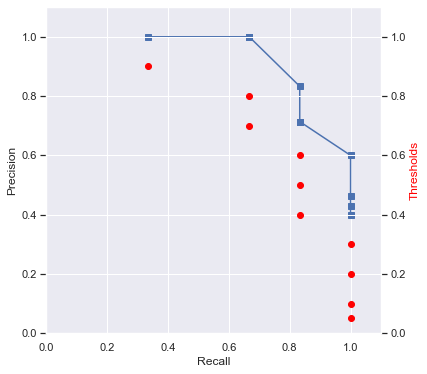

,Threshold,TN,FP,FN,TP,Prec,Reca,f1
0,0.05,0,9,0,6,0.400,1.000,0.571
1,0.10,1,8,0,6,0.429,1.000,0.600
2,0.20,2,7,0,6,0.462,1.000,0.632
3,0.30,5,4,0,6,0.600,1.000,0.750
4,0.40,7,2,1,5,0.714,0.833,0.769
5,0.50,7,2,1,5,0.714,0.833,0.769
6,0.60,8,1,1,5,0.833,0.833,0.833
7,0.70,9,0,2,4,1.000,0.667,0.800
8,0.80,9,0,2,4,1.000,0.667,0.800
9,0.90,9,0,4,2,1.000,0.333,0.500


In [3]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score


thresholds = [0.05, 0.1,0.2,0.3,
             0.4,0.5, 0.6,
              0.7,0.8,0.9]

y_true = [0,1,0,1,1,0,
          1,0,0,0,0,0,
          1,0,1]

# We assume that our predictions come from a model

y_pred = [0.2, 0.3, 0.2, 0.6, 0.8, 0.05, 
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 
          0.85, 0.15, 0.99]


columns = ["Threshold", "TN", "FP", "FN", "TP", "Prec", "Reca", "f1"]
data_list = []


for thr in thresholds:
    predictions = []
    for pred in y_pred:
        if pred >= thr:
            predictions.append(1)
        else:
            predictions.append(0)
    row = [thr] + list(confusion_matrix(y_true, predictions).ravel()) + [round(precision_score(y_true, predictions),3), round(recall_score(y_true, predictions),3), round(f1_score(y_true, predictions),3)]
    data_list.append(row)

results = pd.DataFrame(data=data_list, columns=columns)

prc_fig, ax = plt.subplots(figsize=(6,6))

ax.plot(results['Reca'],results['Prec'],"-s")
ax.set_xlabel("Recall", )
ax.set_xlim((0,1.1))
ax.set_ylim((0,1.1))
# ax.set_yticks([0.4,0.8,1])
ax.set_ylabel("Precision")
ax2=ax.twinx()
ax2.scatter(results['Reca'],thresholds,c='red')
ax2.set_ylabel("Thresholds",color="red")
ax2.set_ylim((0,1.1))

# ax2.set_yticks([0.4,0.8,1])
plt.show()
results

- Another evaluation of a classifier is receiver operation curve (**ROC**) metric. It uses true positive rate (**TPR**) which is the percentage of **TP** amongst all the actual positive instances and false positive rate (**FPR**) which is the percentage of **FP** amongst all the actual negative instances:

$$TPR = \frac{TP}{TP + FN}, FPR = \frac{FP}{FP + TN}$$

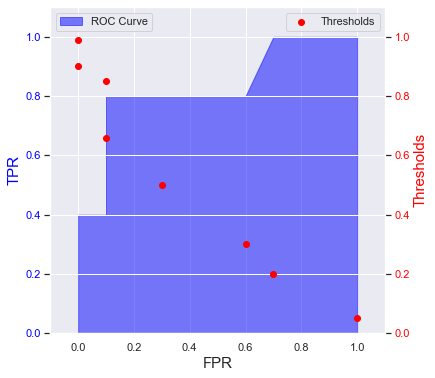

Area Under Curve (AUC) score is 0.8300000000000001


In [4]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay

y_true = [0, 0, 0, 0, 1, 0, 1, 
          0, 0, 1, 0, 1, 0, 0, 1]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 
          0.85, 0.15, 0.99]


auc = roc_auc_score(y_true, y_pred)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1
# that's why we are exlcuding first values such as fpr[1:], tpr[1:] and thresholds[1:]

fig_roc, ax = plt.subplots(figsize=(6,6))
ax.fill_between(fpr[1:],tpr[1:],label="ROC Curve",color="blue", alpha=0.5)
# ax.plot(fpr[1:],tpr[1:],label="ROC Curve",color="blue")
ax.set_xlabel('FPR',fontsize=15)
ax.set_ylabel("TPR",fontsize=15,color="blue")
ax.set_xlim((-0.1,1.1))
ax.set_ylim((0,1.1))
ax.tick_params(axis='y', labelcolor="blue")
ax.legend(loc="upper left")

ax_second = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax_second.scatter(fpr[1:], thresholds[1:], label="Thresholds",color="red")
ax_second.set_ylabel("Thresholds",fontsize=15,color="red")  # we already handled the x-label with ax1
ax_second.tick_params(axis='y', labelcolor="red")
ax_second.legend(loc="upper right")
ax_second.set_xlim((-0.1,1.1))
ax_second.set_ylim((0,1.1))
plt.show()

print(f'Area Under Curve (AUC) score is {auc}')

AUC interpretation goes like this: Given a positive and negative instance, probability such that positive one will be ranked higher than negative one is the value of AUC. It's stated in the book that AUC is widely used for skewed datasets. However, AUC of precision-recall curve demonstrates the class imbalance more clearly and accepted as a better practice. 

**Log loss:** Used in binary classification such that $t \in \{0,1\}$ and $p \in [0,1]$
$$L(t,p) = -[ t.log(p) + (1-t).log(1-p)]$$

Let's check how log loss changes with our confidence of predictions. Higher $p$ means we are sure that datapoint in question is a positive (t=1) instance.

In [6]:
def log_loss(p,t):
    return -t * np.log(p) - (1-t) * np.log(1-p)

size = 200
target = [0] * size + [1] * size # Half of dataset positive and the rest is negative

confident_true_pred = [0.1] * size + [0.9] * size
nonconfident_true_pred = [0.49] * size + [0.51] * size
nonconfident_wrong_pred = [0.51] * size + [0.41] * size
confident_wrong_pred = [0.9] * size + [0.1] * size


predictions = {"Confident true predictions:": confident_true_pred, 
               "Non-confident true predictions:": nonconfident_true_pred,
               "Non-confident wrong predictions:": nonconfident_wrong_pred, 
               "Confident wrong predictions:": confident_wrong_pred}


print("LOSS VALUES")
for case, pred in predictions.items():
    
    loss = sum([log_loss(p,t) for p,t in zip(pred,target)])
    print(case, loss)

LOSS VALUES
Confident true predictions: 42.14420626313056
Non-confident true predictions: 269.3378213055072
Non-confident wrong predictions: 320.98960143224934
Confident wrong predictions: 921.0340371976151


- As clear from the results, log loss is generally high for even true predictions.
- Also, log loss is drastically high for even true but non-confident predictions.
- Finally, log loss punishes confident but wrong predictions severely.

## Multi-class Classification Metrics

- Macro averaged precision: calculate precision for all classes individually and then average them
- Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
- Weighted precision: same as macro but in this case, it is weighted average depending on the number of items in each class

In [7]:
def macro_precision(y_true, y_pred):
    
    n_class = len(set(y_true))
    precision = 0
    
    for class_ in range(n_class):
        
        tp = 0
        fp = 0
        
        for target, pred in zip(y_true, y_pred):
            if target == pred and target == class_:
                tp += 1
            if pred == class_ and target != class_:
                fp += 1
                
        precision += tp / (tp + fp)
        
    return precision / n_class


def micro_precision(y_true, y_pred):
    
    n_class = len(set(y_true))
    tp = 0
    fp = 0    
    
    for class_ in range(n_class):
    
        for target, pred in zip(y_true, y_pred):
            if target == pred and target == class_:
                tp += 1
            if pred == class_ and target != class_:
                fp += 1
            
    precision = tp / (tp + fp)
    
    return precision


def weighted_precision(y_true, y_pred):
    

    n_class = len(set(y_true))
    size_class = [0] * n_class
    
    for target in y_true:
        size_class[target] += 1
    
    
    precision = 0
    
    for class_ in range(n_class):
        
        tp = 0
        fp = 0
        
        for target, pred in zip(y_true, y_pred):
            if target == pred and target == class_:
                tp += 1
            if pred == class_ and target != class_:
                fp += 1
                
        precision += (tp * size_class[class_]) / (tp + fp)
        
    return precision / len(y_true)

- Let's confirm our implementation against `scikit-learn` library methods:

In [8]:
from sklearn.metrics import precision_score

y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]

print("Macro:",macro_precision(y_true, y_pred), precision_score(y_true, y_pred, average="macro"))
print("Micro:",micro_precision(y_true, y_pred), precision_score(y_true, y_pred, average="micro"))
print("Weighted:", weighted_precision(y_true, y_pred), precision_score(y_true, y_pred, average="weighted"))

Macro: 0.3611111111111111 0.3611111111111111
Micro: 0.4444444444444444 0.4444444444444444
Weighted: 0.39814814814814814 0.39814814814814814


- Finally, we can draw confusion matrix for multiclass classification using `scikit-learn`. Book implements its own visualization, nevertheless I believe using a standard library is more useful since producing confusion matrices is a common task

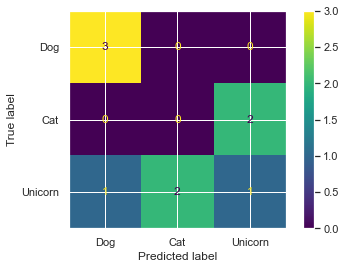

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)

metrics.ConfusionMatrixDisplay(cm, display_labels=["Dog","Cat","Unicorn"]).plot()
plt.show()
# We can also use `metrics.plot_confusion_matrix()` however it requires an estimator

- Reading confusion matrix for a single class goes like this:
    - Diagonal element indicates true positives (**TP**)
    - Columnwise elements indicate false positives (**FP**) except diagonal of course.
    - Rowwise elements indicate false negatives (**FN**)  except diagonal of course.
    - The rest of the elements (excluding the row and column of corresponding diagonal) indicate true negatives (**TN**)

- One should note the orientation of true and predicted label, if transposed then columnwise corresponds to false negatives (**FN**) and rowwise corresponds to false positives (**FP**).

## Multi-label Classification Metrics

- Given a datapoint, we can assign more than one label to it. For example, a picture might contain a cat, a dog, a chair and so on. Therefore, prediction is a list containing the corresponding numerical values of the labels. Considering a picture dataset composed of datapoints with 10 different possible objects in each, our prediction might be either a list y = [2,6,8] or one-hot encoding list y = [0,0,1,0,0,0,1,0,1,0].

In [10]:
def pak(y_true, y_pred, k):
    
    y_local = y_pred[:k]
    pred_set = set(y_local)
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set)
    return len(common_values) / len(y_local) # how many predictions are made 


def apak(y_true, y_pred, k):
    
    pak_values = 0
    
    for i in range(1,k+1):
        pak_values += pak(y_true, y_pred, i)
        
    return pak_values / k


def mapak(y_true, y_pred, k):
    
    result = 0
    for target, pred in zip(y_true, y_pred):
        result += apak(target, pred, k)
        
    return result / len(y_true)

In [11]:
y_true = [[1, 2, 3], [0, 2], [1],[2, 3],[1, 0],[]]
y_pred = [[0, 1, 2], [1], [0,2,3], [2,3,4,0], [0,1,2],[0]]

for k in range(1,5):
    print(mapak(y_true, y_pred,k))

0.3333333333333333
0.375
0.3611111111111111
0.34722222222222215


## Regression Evaluation Metrics

- So far we have only covered classification metrics. Now, it's time for regression metrics. The easiest metric is $\bf{Error}$ which goes like this given that true label $y$ and prediction $\hat{y}(x)$:

$$\mathbf{Error} = y - \hat{y}(x)$$

- More grounded version is absolute error since positive and negative error results might cancel each other out producing zero error. Generally an averaged version is used called mean absolute error (MAE):

$$\mathbf{Absolute~Error} = | y - \hat{y}(x)|$$
$$\mathbf{MAE} = \frac{1}{m} \sum_{i=1}^{m}| y - \hat{y}(x)|$$

- Finally, the most common metric is root mean squared error (RMSE):
$$\mathbf{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y - \hat{y}(x))^{2}}$$

- Additionally, we have coefficient of determination $R^{2}$:
$$ R^{2} = 1 - \frac{\sum_{i=1}^{m} (y_{i} - y_{pred})^{2}}{\sum_{i=1}^{m} (y_{i} - y_{mean})^{2}} $$

Let's implement the last one and compare it with `sklearn`:


In [114]:
def r_squared_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    rss = np.sum((y_true - y_pred) ** 2)
    var = np.sum((y_true - y_mean) ** 2)
    result = 1 - rss / var
    return result

X = (np.linspace(-100, 100, 1000)).reshape(-1, 1)
y = X * 0.6 + np.random.normal(0,1,size=(1000, 1)) + 10

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression = LinearRegression()
linear_regression.fit(X, y)

y_pred = linear_regression.predict(X)
print(f"Implemented: {r_squared_score(y, y_pred)}, sklearn: {r2_score(y, y_pred)}")


Implemented: 0.9992012535732114, sklearn: 0.9992012535732114
